# Lecture 1 - 게이트와 양자 회로
# 1-0 단일 큐비트 게이트
## 1. 파울리 게이트 (Pauli Gates)
### 파울리-X 게이트
파울리-X 게이트는 고전 회로에서 NOT gate와 유사한 특성을 나타내고 있으며 bit-flip 게이트라고도 알려져있습니다. 파울리-X 게이트는 $|0\rangle$ 상태인 큐비트를 $|1\rangle$로 만들며 반대로 $|1\rangle$인 상태인 큐비트를 $|0\rangle$로 만듭니다. 파울리-X 게이트의 수학적 표현은 아래와 같습니다.

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

#### 코드 구현
##### $|0\rangle$의 상태인 큐비트를 $|1\rangle$로 만들기
시작하기에 앞서 코드에 관한 내용은 추후 장에서 자세히 설명합니다. 이번 장에서는 게이트의 사용과 양자 회로의 output으로부터 개념을 이해해봅시다.

게이트와 양자회로를 그리기 위해 Python 라이브러리인 Qiskit을 불러오겠습니다


In [1]:
from qiskit import * #qiskit 전체 라이브러리 불러오기
from qiskit.providers.aer import StatevectorSimulator #StatevectorSimulator를 사용하여 양자회로의 최종 양자 statevector을 구할수 있음
from math import pi, sqrt #math 라이브러리에서 pi와 sqrt 불러오기
from qiskit.visualization import * #양자상태를 시각화 하기 위해 qiskit.visualization 불러오기

Qiskit을 이용해 하나의 상태가 $|0\rangle$인 큐비트를 만들어 보겠습니다.

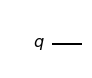

In [2]:
qc1 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc1.draw(output="mpl") #위에서 그린 양자회로를 시각화하여 그리기 (mpl은 matplotlib의 약자임)

블로흐 구를 그려 양자 회로의 최종 양자의 상태를 시각화 합니다

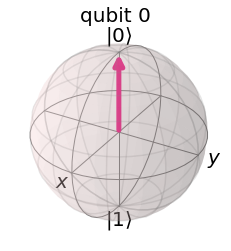

In [3]:
state0 = execute(qc1, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state0) # 블로흐 구 그리기

위에 있는 블로흐 구를 보면 블루흐 구의 화살표가 $|0\rangle$를 정확히 가르키고 있으며 어떠한 게이트도 큐비트에 가해지지 않았기에 최종 상태가 $|0\rangle$이라는것을 확인할 수 있습니다.

게이트가 없는 큐비트의 상태를 확인했으니 이제는 X 게이트를 기존에 있는 양자 회로에 추가해보겠습니다.

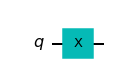

In [4]:
qc1.x(0) #X 게이트를 큐비트0에 추가하기
qc1.draw(output="mpl") #양자회로 그리기

블로흐 구를 그려 X-게이트가 기존 블로흐 구를 어떻게 변화시켰는지 확인해봅시다

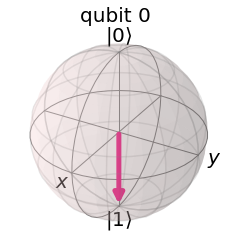

In [5]:
state1 = execute(qc1, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state1) # 블로흐 구 그리기

예상과 같이 블루흐 구에서 화살표가 정확히 $|1\rangle$을 가르키고 있으며 최종 상태가 $|1\rangle$ 이라는것을 확인할 수 있습니다. 블로흐 구의 변화를 보게 되면 X-게이트로 인해 x축을 기준으로 $\pi$ 라디안 만큼 회전한것을 볼 수 있습니다.

##### $|1\rangle$의 상태인 큐비트를 $|0\rangle$로 만들기
그러면 다시 상태가 $|1\rangle$인 큐비트를 X-gate를 이용하여 $|0\rangle$로 전환해봅시다.

X-게이트를 양자회로에 하나더 추가합니다

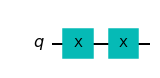

In [6]:
qc1.x(0) #X 게이트를 큐비트0에 추가하기
qc1.draw(output="mpl") #양자회로 그리기

블로흐 구를 그려 X-게이트가 또 다시 블로흐 구를 어떻게 변화시켰는지 확인해봅시다

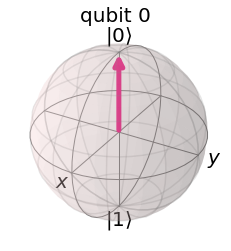

In [7]:
state2 = execute(qc1, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state2) # 블로흐 구 그리기

블로흐 구를 보게 되면 $|1\rangle$이였던 상태가 다시 X-게이트로 인해 $|0\rangle$로 돌아간것을 확인할 수 있습니다.

##### 수학적 표현
X-게이트로 인한 큐비트의 상태 변환은 아래와 같습니다.

###### X-게이트를 사용하여 큐비트의 상태 변환 $|0\rangle$ -> $|1\rangle$
$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

###### X-게이트를 사용하여 큐비트의 상태 변환 $|1\rangle$ -> $|0\rangle$
$$ X|1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

### 파울리-Y 게이트
파울리-Y 게이트는 bit-flip를 하고 phase-flip하는 게이트라고도 알려져있습니다. 파울리-Y 게이트는 X-게이트와 같이 $|0\rangle$ 상태인 큐비트를 $|1\rangle$로 만들며 반대로 $|1\rangle$인 상태인 큐비트를 $|0\rangle$로 만들며 동시에 상대적으로 위상을 반전시킵니다. 파울리-Y 게이트의 수학적 표현은 아래와 같습니다.

$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0\rangle\langle1| + i|1\rangle\langle0| $$

#### 코드 구현
##### $|0\rangle$의 상태인 큐비트를 $|1\rangle$로 만들고 위상전환 하기

우선 큐비트 1개를 만들고 Y-게이트를 양자회로에 추가합니다.

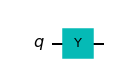

In [8]:
qc2 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc2.y(0) #Y 게이트를 큐비트0에 추가하기
qc2.draw('mpl') #양자회로 그리기

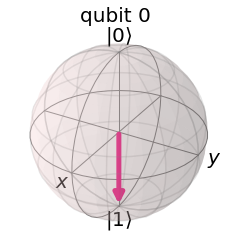

In [9]:
state3 = execute(qc2, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state3) # 블로흐 구 그리기

예상과 같이 블루흐 구에서 화살표가 정확히 $|1\rangle$을 가르키고 있으며 최종 상태가 $|1\rangle$ 이라는것을 확인할 수 있습니다. 블로흐 구의 변화를 보게 되면 Y-게이트로 인해 X축을 기준으로 $\pi$ 라디안 만큼 회전한것을 볼 수 있습니다. 하지만 블로흐 구만 보고서는 위상이 전환이 됬는지 확인 할 수 없습니다. 아래에는 q-sphere이라고 불리는 위상과 큐비트의 상태를 확인 할 수 있는 시각화를 사용하였습니다.
###### Y-게이트로 인한 큐비트의 상태와 이상전환
[![y-gate1](./figure/q-sphere_y-gate.png)](https://quantum-computing.ibm.com/composer/files/eb75c69ba2f0dc171e47f3af060c3513)

위에 있는 q-sphere 그림을 보면 큐비트의 상태가 $|1\rangle$를 나타내고 있지만 동시에 위상이 $\pi/2$인 상태를 확인 할 수 있습니다. 아래의 그림을 보게 되면 X-gate와 Y-gate로 인한 큐비트의 상태와 위상의 변환을 확인해볼 수 있습니다. X-게이트로 인해서는 위상이 변화하지 않았고 Y-gate를 통해서는 위상이 $\pi/2$ 만큼 변화했습니다

![x-gate_y-gate](./figure/x-gate_y-gate_q-sphere.png)

##### $|1\rangle$의 상태인 큐비트를 $|0\rangle$로 만들고 위상전환 하기

우선 큐비트 1개를 만들고 X-게이트로 초기 상태를 $|1\rangle$로 설정해주며 Y-게이트를 양자회로에 추가합니다.

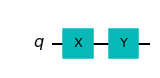

In [10]:
qc2 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc2.x(0) #X 게이트를 큐비트0에 추가하여 큐비트의 초기 상태를 |1>로 설정하기
qc2.y(0) #Y 게이트를 큐비트0에 추가하기
qc2.draw('mpl') #양자회로 그리기

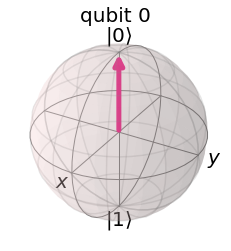

In [11]:
state4 = execute(qc2, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state4) # 블로흐 구 그리기

결과를 통하여 $|1\rangle$이였던 큐비트의 상태가 다시 $|0\rangle$로 Y-게이트로 통하여 돌아온것을 확인할 수 있습니다. 이번에도 q-spehre을 통하여 위상은 어떻게 변하였는지 확인해봅시다

![y-gate2](figure/q-sphere_y-gate_from_state_1.png)

이번 q-sphere을 보면 위상이 $3\pi/2$인것을 확인할 수 있습니다. Y-게이트의 수학적 표현을 보면 알겠지만 $|1\rangle$상태의 큐비트에서 Y-게이트가 가해지면 위상전환이 반대 방향으로 이루어집니다.

##### 수학적 표현
Y-게이트로 인한 큐비트의 상태 변환은 아래와 같습니다.

###### Y-게이트를 사용하여 큐비트의 상태와 위상 변환 $|0\rangle$ -> $i|1\rangle$
$$ Y|0\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ i \end{bmatrix} = i|1\rangle$$

###### Y-게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $-i|0\rangle$
$$ Y|1\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} -i \\ 0 \end{bmatrix} = -i|0\rangle$$

### 파울리-Z 게이트
파울리-Y 게이트는 phase-flip하는 게이트라고도 알려져있습니다. 파울리-Z 게이트는 X-게이트나 Y-게이트와 다르게 $|0\rangle$ 상태인 큐비트를 $|0\rangle$으로 유지하며 $|1\rangle$인 상태인 큐비트 또한 $|1\rangle$로 유지합니다. 하지만 특별한 상태에서는 동시에 상대적으로 위상을 반전시킵니다. 파울리-Z 게이트의 수학적 표현은 아래와 같습니다.

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle0| - |1\rangle\langle1| $$

#### 코드 구현
##### $|0\rangle$의 상태인 큐비트에 Z-게이트 추가하기

우선 큐비트 1개를 만들고 Z-게이트를 양자회로에 추가합니다.

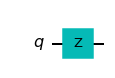

In [12]:
qc3 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc3.z(0) #Z 게이트를 큐비트0에 추가하기
qc3.draw('mpl') #양자회로 그리기

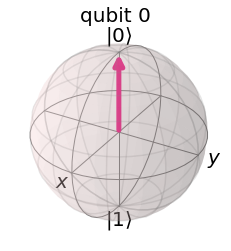

In [13]:
state5 = execute(qc3, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state5) # 블로흐 구 그리기

###### Z-게이트로 인한 $|0\rangle$상태의 큐비트 [Q-sphere]

[![z-gate1](./figure/q-sphere_z-gate.png)](https://quantum-computing.ibm.com/composer/files/32d4d066e78e5e9bf0715dca507ad263)

블루흐 구에서 화살표가 정확히 $|0\rangle$을 가르키고 있으며 최종 상태가 $|0\rangle$이라는것을 확인할 수 있습니다. 수학적으로 Z-게이트로 인해 Z축을 기준으로 $\pi$ 라디안 만큼 회전합니다. 또한 q-sphere을 통해서 보았을때 위상에 대한 변화도 없는것을 확인할 수 있습니다.

##### $|1\rangle$의 상태인 큐비트에 Z-게이트 추가하기

우선 큐비트 1개를 만들고 X-게이트로 초기 큐비트의 상태를 $|1\rangle$로 만들어주며 Z-게이트를 양자회로에 추가합니다.

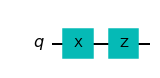

In [14]:
qc3 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc3.x(0) #X 게이트를 큐비트0에 추가하여 |1>상태로 만들기
qc3.z(0) #Z 게이트를 큐비트0에 추가하기
qc3.draw('mpl') #양자회로 그리기

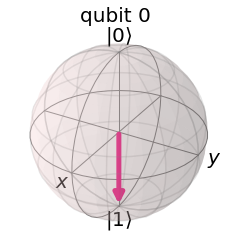

In [15]:
state6 = execute(qc3, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state6) # 블로흐 구 그리기

###### Z-게이트로 인한 $|1\rangle$상태의 큐비트 [Q-sphere]

[![z-gate2](./figure/q-sphere_z-gate_from_state_1.png)](https://quantum-computing.ibm.com/composer/files/4ba604cfd3e757d23391f986fd4ed206)

블루흐 구에서 화살표가 정확히 $|1\rangle$을 가르키고 있으며 최종 상태가 $|1\rangle$이라는것을 확인할 수 있습니다. 또한 q-sphere을 통해서 보았을때 $|1\rangle$이였던 상태의 위상에 대한 변화가 $\pi$만큼 생긴것을 확인할 수 있습니다.

##### 수학적 표현
Z-게이트로 인한 큐비트의 상태 변환은 아래와 같습니다.

###### Z-게이트를 사용하여 큐비트의 위상 변환 $|0\rangle$ -> $|0\rangle$
$$ Z|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

###### Z-게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $-|1\rangle$
$$ Z|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix} = -|1\rangle$$

## 2. 하다마드 게이트 (Hadamard Gates)

하다마드 게이트, H-게이트는 근본적인 양자 게이트 입니다. 하다마드 게이트는 블로흐 구의 극(pole)으로 부터 움직여 $|0\rangle$과 $|1\rangle$의 중첩 상태를 만들어 줄 수 있습니다. 하다마드 게이트의 수학적 표현은 아래와 같습니다.

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

#### 코드 구현
##### $|0\rangle$상태로 부터 $|0\rangle$과 $|1\rangle$의 중첩 상태로 만들기

우선 큐비트 1개를 만들고 하다마드 게이트를 양자회로에 추가합니다.


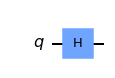

In [16]:
qc4 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc4.h(0) #하다마드 게이트를 큐비트0에 추가하기
qc4.draw('mpl') #양자회로 그리기

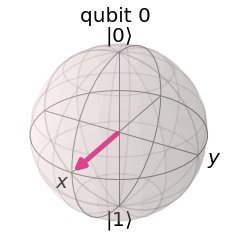

In [17]:
state7 = execute(qc4, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state7) # 블로흐 구 그리기

###### $|0\rangle$상태의 큐비트에 하다마드 게이트 [Q-sphere]

[![h-gate1](./figure/q-sphere_h-gate.png)](https://quantum-computing.ibm.com/composer/files/153a07d9525ce1880ba9284ad205e63d)

블루흐 구에서 화살표가 정확히 $|0\rangle$과 $|1\rangle$사이인 X축에서 앞을 가르키고 있으며 최종 상태가 $|0\rangle$과 $|1\rangle$의 중첩상태 이라는것을 확인할 수 있습니다. 또한 q-sphere을 통해서 보았을때 중첩 상태를 측정했을때 나올 수 있는 상태가 $|0\rangle$과 $|1\rangle$ 두가지의 상태인것을 확인 할 수 있습니다. 측정에 대한 자세한 내용은 추후 장에서 설명 하겠습니다.

##### $|1\rangle$상태로 부터 $|0\rangle$과 $|1\rangle$의 중첩 상태로 만들기

우선 큐비트 1개를 만들고 X-게이트를 추가해 $|1\rangle$상태인 큐비트를 만들어주며 하다마드 게이트를 양자회로에 추가합니다.

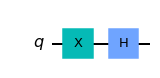

In [18]:
qc4 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc4.x(0) #X 게이트를 이용해 큐비트0을 |1>상태로 만들기
qc4.h(0) #하다마드 게이트를 큐비트0에 추가하기
qc4.draw('mpl') #양자회로 그리기

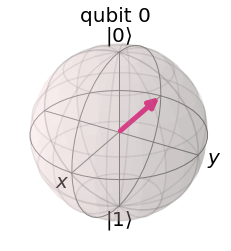

In [19]:
state8 = execute(qc4, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state8) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 하다마드 게이트 [Q-sphere]

[![h-gate2](./figure/q-sphere_h-gate_from_state_1.png)](https://quantum-computing.ibm.com/composer/files/e42937df7467feda740e85f7b658e8c3)

블루흐 구에서 화살표가 정확히 $|0\rangle$과 $|1\rangle$사이인 X축에서 뒤를 가르키고 있으며 최종 상태가 $|0\rangle$과 $|1\rangle$의 중첩상태 이라는것을 확인할 수 있습니다. 또한 q-sphere을 통해서 보았을때 중첩 상태를 측정했을때 나올 수 있는 상태가 $|0\rangle$과 $|1\rangle$ 두가지의 상태인것을 확인 할 수 있습니다. 하지만 하다마드 게이트의 수학적 표현을 통하여 예측할수 있듯이 중첩된 $|1\rangle$의 위상 변화가 $\pi$ 라디안 만큼 일어난것을 확인할 수 있습니다.

##### 수학적 표현
하다마드 게이트로 인한 큐비트의 상태 변환은 아래와 같습니다.

###### 하다마드 게이트를 사용하여 큐비트의 상태와 위상 변환 $|0\rangle$ -> $|+\rangle$
$$ H|0\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle$$

###### 하다마드 게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $|-\rangle$
$$ H|1\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)  = |-\rangle$$

## 3. S-게이트 (S-Gate)

S-게이트는 상태가 $|1\rangle$인 큐비트의 위상을 $\pi/2$만큼 블로흐 구에서 Z축을 중심으로 회전을 합니다. 반대로 $S^\dagger$-게이트는 상태가 $|1\rangle$인 큐비트의 위상을 $-\pi/2$만큼 블로흐 구에서 Z축을 중심으로 회전을 합니다. S-게이트는 $\sqrt{Z}$-게이트라고도 불리며 Z-게이트의 반만큼 회전을 합니다. 반대로 $S^\dagger$-게이트는 $\sqrt{Z^\dagger}$-게이트라고도 불리며 Z-게이트의 반대 방향으로 반만큼 회전합니다. S-게이트와 $S^\dagger$-게이트의 수학적 표현은 아래와 같습니다.

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix} \quad S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix} $$ 

#### 코드 구현
##### $|0\rangle$의 상태인 큐비트에 S-게이트 추가하기

우선 큐비트 1개를 만들고 S-게이트를 양자회로에 추가합니다.

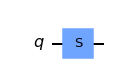

In [20]:
qc5 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc5.s(0) #Z 게이트를 큐비트0에 추가하기
qc5.draw('mpl') #양자회로 그리기

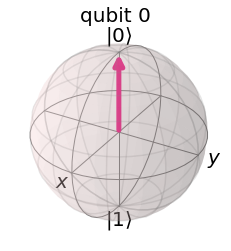

In [21]:
state9 = execute(qc5, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state9) # 블로흐 구 그리기

###### $|0\rangle$상태의 큐비트에 S-게이트 [Q-sphere]

[![s-gate1](./figure/q-sphere_s-gate.png)](https://quantum-computing.ibm.com/composer/files/45b8a2021cc391df0f55cc61acbb187e)

예상과 동일하게 $|0\rangle$인 상태인 큐비트에는 상태에 영향을 주지 않으며 위상 또한 변하지 않았습니다

##### $|0\rangle$의 상태인 큐비트에 $S^\dagger$-게이트 추가하기

우선 큐비트 1개를 만들고 $S^\dagger$-게이트를 양자회로에 추가합니다.

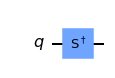

In [22]:
qc6 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc6.sdg(0) #S-dagger 게이트를 큐비트0에 추가하기
qc6.draw('mpl') #양자회로 그리기

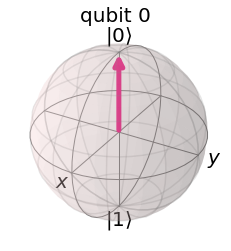

In [23]:
state10 = execute(qc6, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state10) # 블로흐 구 그리기

###### $|0\rangle$상태의 큐비트에 $S^\dagger$-게이트 [Q-sphere]

[![sdg-gate1](./figure/q-sphere_sdg-gate.png)](https://quantum-computing.ibm.com/composer/files/bae4519d8789b522d11797326c03778e)


##### $|1\rangle$의 상태인 큐비트에 S-게이트 추가하기

우선 큐비트 1개를 만들고 X-gate를 추가해 $|1\rangle$상태의 큐비트를 준비해주고 S-게이트를 양자회로에 추가합니다.

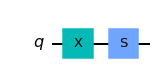

In [24]:
qc5 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc5.x(0) #X 게이트를 넣어 큐비트를 |1> 상태로 만들기
qc5.s(0) #S 게이트를 큐비트0에 추가하기
qc5.draw('mpl') #양자회로 그리기

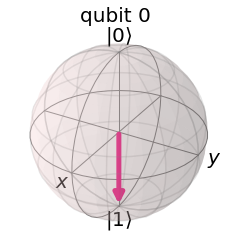

In [25]:
state11 = execute(qc5, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state11) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 S-게이트 [Q-sphere]

[![s-gate2](./figure/q-sphere_s-gate2.png)](https://quantum-computing.ibm.com/composer/files/9e695e173011268e0bf4e6e49e603f8a)

$|1\rangle$상태의 큐비트에 위상 상태가 $\pi/2$만큼 변화된것을 확인할 수 있습니다.

##### $|1\rangle$의 상태인 큐비트에 $S^\dagger$-게이트 추가하기

우선 큐비트 1개를 만들고 X-gate를 추가해 $|1\rangle$상태의 큐비트를 준비해주고 $S^\dagger$-게이트를 양자회로에 추가합니다.

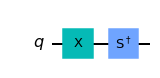

In [26]:
qc6 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc6.x(0) #X 게이트를 넣어 큐비트를 |1> 상태로 만들기
qc6.sdg(0) #S-dagger 게이트를 큐비트0에 추가하기
qc6.draw('mpl') #양자회로 그리기

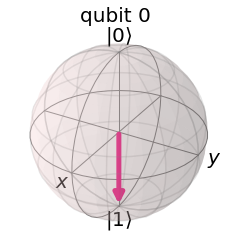

In [27]:
state11 = execute(qc5, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state11) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 $S^\dagger$-게이트 [Q-sphere]

[![sdg-gate2](./figure/q-sphere_sdg-gate2.png)](https://quantum-computing.ibm.com/composer/files/c6a52f559e3187fb4b95ce2a5d9c7844)

$|1\rangle$상태의 큐비트에 위상 상태가 -$\pi/2$만큼 변화되어 최종적으로 위상이 $-3\pi/2$인것을 확인할 수 있습니다.

##### S-게이트 S-게이트가 Z-게이트와 동일한지 확인

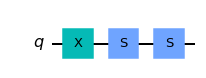

In [28]:
qc7 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc7.x(0) #X 게이트를 넣어 큐비트를 |1> 상태로 만들기
qc7.s(0) #S 게이트를 큐비트0에 추가하기
qc7.s(0) #두번째 S 게이트를 큐비트0에 추가하기
qc7.draw('mpl') #양자회로 그리기

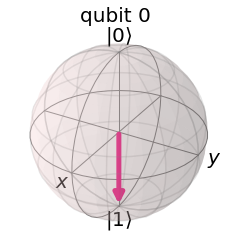

In [29]:
state12 = execute(qc7, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state12) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 Z-게이트와 SS-게이트  비교 [Q-sphere]

![comparison](figure/ss-gate_z-gate_comparison.png)

S-게이트 두개를 합친 결과가 Z-게이트 한개를 가한 결과와 같다는것을 확인할 수 있습니다.

##### 수학적 표현
S-게이트와 $S^\dagger$로 인한 큐비트의 상태 변환은 아래와 같습니다.

###### S-게이트를 사용하여 큐비트의 상태와 위상 변환 $|0\rangle$ -> $|0\rangle$
$$ S|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

###### S-게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $e^{\frac{i\pi}{2}}|1\rangle$
$$ S|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ e^{\frac{i\pi}{2}} \end{bmatrix}  = e^{\frac{i\pi}{2}}|1\rangle$$

###### $S^\dagger$-게이트를 사용하여 큐비트의 상태와 위상 변환 $|0\rangle$ -> $|0\rangle$
$$ S^\dagger|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

###### $S^\dagger$-게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $e^{\frac{-i\pi}{2}}|1\rangle$
$$ S^\dagger|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ e^{\frac{-i\pi}{2}} \end{bmatrix}  = e^{\frac{-i\pi}{2}}|1\rangle$$

## 4. T-게이트 (T-Gate)

T-게이트는 상태가 $|1\rangle$인 큐비트의 위상을 $\pi/4$만큼 블로흐 구에서 Z축을 중심으로 회전을 합니다. 반대로 $T^\dagger$-게이트는 상태가 $|1\rangle$인 큐비트의 위상을 $-\pi/4$만큼 블로흐 구에서 Z축을 중심으로 회전을 합니다. T-게이트는 $\sqrt{S}$-게이트라고도 불리며 S-게이트의 반만큼 회전을 합니다. 반대로 $T^\dagger$-게이트는 $\sqrt{S^\dagger}$-게이트라고도 불리며 S-게이트의 반대 방향으로 반만큼 회전합니다. 따라서 $TTTT = SS = Z $이며 $T^\dagger T^\dagger T^\dagger T^\dagger = S^\dagger S^\dagger =Z ^\dagger$입니다. T-게이트와 $T^\dagger$-게이트의 수학적 표현은 아래와 같습니다.

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix} \quad S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix} $$ 

#### 코드 구현
##### $|1\rangle$의 상태인 큐비트에 T-게이트 추가하기

우선 큐비트 1개를 만들고 X-gate를 추가해 $|1\rangle$상태의 큐비트를 준비해주고 T-게이트를 양자회로에 추가합니다.

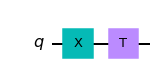

In [30]:
qc8 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc8.x(0) #X 게이트를 넣어 큐비트를 |1> 상태로 만들기
qc8.t(0) #T 게이트를 큐비트0에 추가하기
qc8.draw('mpl') #양자회로 그리기

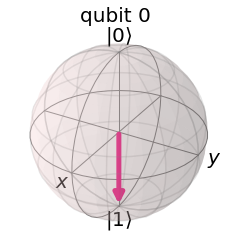

In [31]:
state13 = execute(qc8, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state13) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 T-게이트 [Q-sphere]

[![t-gate1](./figure/q-sphere_t-gate.png)](https://quantum-computing.ibm.com/composer/files/afdc6c2b0e519ee80b5d5c04d8c7a489)

$|1\rangle$상태의 큐비트에 위상 상태가 $\pi/4$만큼 변화된것을 확인할 수 있습니다.

##### $|1\rangle$의 상태인 큐비트에 $T^\dagger$-게이트 추가하기

우선 큐비트 1개를 만들고 X-gate를 추가해 $|1\rangle$상태의 큐비트를 준비해주고 $T^\dagger$-게이트를 양자회로에 추가합니다.

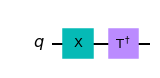

In [32]:
qc9 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc9.x(0) #X 게이트를 넣어 큐비트를 |1> 상태로 만들기
qc9.tdg(0) #T-dagger 게이트를 큐비트0에 추가하기
qc9.draw('mpl') #양자회로 그리기

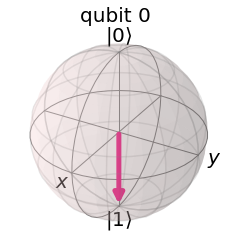

In [33]:
state14 = execute(qc9, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state14) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 $T^\dagger$-게이트 [Q-sphere]

[![t-gate2](./figure/q-sphere_tdg-gate.png)](https://quantum-computing.ibm.com/composer/files/4f88b35c05e24902c07c93f3295928fd)

$|1\rangle$상태의 큐비트에 위상 상태가 -$\pi/4$만큼 변화되어 최종적으로 위상이 $-7\pi/4$인것을 확인할 수 있습니다.

##### T-게이트 T-게이트가 S-게이트와 동일한지 확인


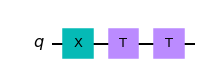

In [34]:
qc10 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc10.x(0) #X 게이트를 넣어 큐비트를 |1> 상태로 만들기
qc10.t(0) #T 게이트를 큐비트0에 추가하기
qc10.t(0) #두번째 T 게이트를 큐비트0에 추가하기
qc10.draw('mpl') #양자회로 그리기

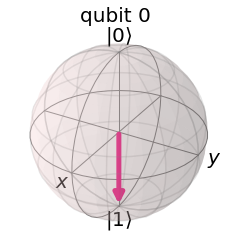

In [35]:
state15 = execute(qc10, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state15) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 S-게이트와 TT-게이트  비교 [Q-sphere]

![comparison2](figure/tt-gate_s-gate_comparison.png)

T-게이트 두개를 합친 결과가 S-게이트 한개를 가한 결과와 같다는것을 확인할 수 있습니다.

##### 수학적 표현
T-게이트와 $T^\dagger$로 인한 큐비트의 상태 변환은 아래와 같습니다.

###### T-게이트를 사용하여 큐비트의 상태와 위상 변환 $|0\rangle$ -> $|0\rangle$
$$ T|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

###### T-게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $e^{\frac{i\pi}{4}}|1\rangle$
$$ T|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ e^{\frac{i\pi}{4}} \end{bmatrix}  = e^{\frac{i\pi}{4}}|1\rangle$$

###### $T^\dagger$-게이트를 사용하여 큐비트의 상태와 위상 변환 $|0\rangle$ -> $|0\rangle$
$$ T^\dagger|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

###### $T^\dagger$-게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $e^{\frac{-i\pi}{4}}|1\rangle$
$$ T^\dagger|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ e^{\frac{-i\pi}{4}} \end{bmatrix}  = e^{\frac{-i\pi}{4}}|1\rangle$$

## 5. P-게이트 (P-Gate)

P-게이트는 매개변수화 되어 있어 $\phi$에 숫자를 지정해 어떠한 작업을 해야하는지 정해줘야 합니다. P-게이트는 블로흐 구에서 Z축을 중심으로 $\phi$만큼 회전을 합니다. P-게이트의 수학적 표현은 아래와 같습니다. 여기서 $\phi$는 실수여야 합니다.

$$ P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix} $$

#### 코드 구현
##### $|1\rangle$의 상태인 큐비트에 P-게이트 추가하기, $\phi=\pi/4$


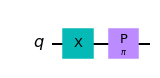

In [36]:
qc11 = QuantumCircuit(1) #큐비트 1개인 양자회로 만들기
qc11.x(0) #X 게이트를 넣어 큐비트를 |1> 상태로 만들기
qc11.p(pi, 0) #P 게이트를 큐비트0에 추가하기
qc11.draw('mpl') #양자회로 그리기

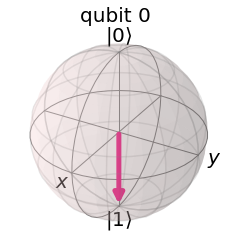

In [37]:
state16 = execute(qc11, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
plot_bloch_multivector(state16) # 블로흐 구 그리기

###### $|1\rangle$상태의 큐비트에 P-게이트 [Q-sphere]
###### 1. $P-게이트, \phi=\pi/4$
![p-gate1](./figure/q-sphere_comparison1.png)

###### 2. $P-게이트, \phi=\pi/2$
![p-gate2](./figure/q-sphere_comparison2.png)

###### 3. $P-게이트, \phi=\pi$
![p-gate3](./figure/q-sphere_comparison3.png)

$|1\rangle$상태의 큐비트에 위상 상태가 $\phi$만큼 변화된것을 확인할 수 있습니다. 위 그림과 같이 $\phi$를 지정해주면서 T-게이트, S-게이트, Z-게이트와 같은 기존 게이트도 구현할 수 있습니다.

##### 수학적 표현
P-게이트로 인한 큐비트의 상태 변환은 아래와 같습니다. 여기서 $\phi$는 실수 입니다.

###### P-게이트를 사용하여 큐비트의 상태와 위상 변환 $|0\rangle$ -> $|0\rangle$
$$ P|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle$$

###### P-게이트를 사용하여 큐비트의 상태와 위상 변환 $|1\rangle$ -> $e^{i\phi}|1\rangle$
$$ P|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ e^{i\phi} \end{bmatrix}  = e^{i\phi}|1\rangle$$

## 6. Rotation Gates
### Rx 게이트
Rx 게이트는 $\theta$만큼 x 축에 대해 회전을 합니다.

#### 초기 $|0\rangle$ 상태의 큐비트



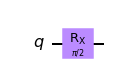

In [38]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.rx(pi/2,0) #Rx 게이트를 넣어 큐비트 0에 pi/2만큼 회전시키기
qc.draw(output="mpl") #양자회로 그리기

아래 코드에서는 큐비트 0을 $\frac{\pi}{2}$ 만큼 회전하는 Rx 게이트의 양자회로를 실행을 시켜 Rx 게이트의 단위 행렬(unitary matrix)를 출력합니다.

In [39]:
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기

job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[0.707+0.j   , 0.   -0.707j],
          [0.   -0.707j, 0.707+0.j   ]],
         input_dims=(2,), output_dims=(2,))


아래 코드에서는 큐비트 0을 $\frac{\pi}{2}$ 만큼 회전하는 Rx 게이트의 양자회로를 실행을 시켜 Rx 게이트의 상태 벡터(state vector)를 출력합니다.

In [40]:
state17 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state17.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

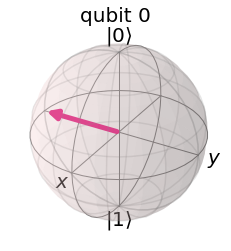

In [41]:
plot_bloch_multivector(state17) # 블로흐 구 그리기

$|0\rangle$상태의 큐비트에 Rx 게이트 [Q-sphere]

![rx-gate](./figure/q-sphere_rx-gate.png)

#### 초기 $|1\rangle$ 상태의 큐비트



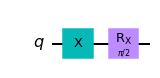

In [42]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.x(0) #|1> 상태로 만들어주기
qc.rx(pi/2,0) #Rx 게이트를 넣어 큐비트 0에 pi/2만큼 회전시키기
qc.draw(output="mpl") #양자회로 그리기

In [43]:
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기

job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #실행 결과를 출력하기

Operator([[-0.   -0.707j,  0.707-0.j   ],
          [ 0.707-0.j   , -0.   -0.707j]],
         input_dims=(2,), output_dims=(2,))


In [44]:
state18 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state18.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

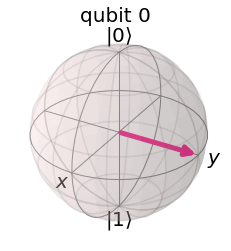

In [45]:
plot_bloch_multivector(state18) # 블로흐 구 그리기

$|1\rangle$상태의 큐비트에 Rx 게이트 [Q-sphere]

![rx-gate](./figure/q-sphere_rx-gate2.png)

#### 수학적 표현
$$ R_x(\theta) = \begin{pmatrix} \cos{(\frac{\theta}{2})} & -i\sin{(\frac{\theta}{2})} \\
-i\sin{(\frac{\theta}{2})} & \cos{(\frac{\theta}{2})} \end{pmatrix}$$

### Ry 게이트
Ry 게이트는 $\theta$만큼 y 축에 대해 회전을 합니다.

#### 초기 $|0\rangle$ 상태의 큐비트

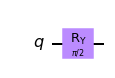

In [46]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.ry(pi/2,0) #Ry 게이트를 넣어 큐비트 0에 pi/2만큼 회전시키기
qc.draw(output="mpl") #양자회로 그리기

아래 코드에서는 큐비트 0을 $\frac{\pi}{2}$ 만큼 회전하는 Ry 게이트의 양자회로를 실행을 시켜 Ry 게이트의 단위 행렬을 출력합니다.

In [47]:
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기

job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[ 0.707+0.j, -0.707+0.j],
          [ 0.707+0.j,  0.707+0.j]],
         input_dims=(2,), output_dims=(2,))


아래 코드에서는 큐비트 0을 $\frac{\pi}{2}$ 만큼 회전하는 Ry 게이트의 양자회로를 실행을 시켜 Ry 게이트의 상태 벡터를 출력합니다.

In [48]:
state19 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state19.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

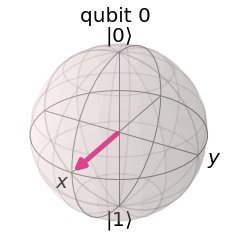

In [49]:
plot_bloch_multivector(state19) # 블로흐 구 그리기

$|0\rangle$상태의 큐비트에 Ry 게이트 [Q-sphere]

![ry-gate](./figure/q-sphere_ry-gate.png)

#### 초기 $|1\rangle$ 상태의 큐비트



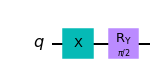

In [50]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.x(0) #|1> 상태로 만들어주기
qc.ry(pi/2,0) #Ry 게이트를 넣어 큐비트 0에 pi/2만큼 회전시키기
qc.draw(output="mpl") #양자회로 그리기

In [51]:
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기

job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #실행 결과를 출력하기

Operator([[-0.707+0.j,  0.707-0.j],
          [ 0.707+0.j,  0.707+0.j]],
         input_dims=(2,), output_dims=(2,))


In [52]:
state20 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state20.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

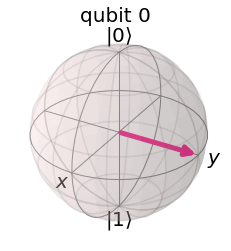

In [53]:
plot_bloch_multivector(state18) # 블로흐 구 그리기

$|1\rangle$상태의 큐비트에 Ry 게이트 [Q-sphere]

![ry-gate2](./figure/q-sphere_ry-gate2.png)

#### 수학적 표현
$$ R_y(\theta) = \begin{pmatrix} \cos{(\frac{\theta}{2})} & -\sin{(\frac{\theta}{2})} \\
\sin{(\frac{\theta}{2})} & \cos{(\frac{\theta}{2})} \end{pmatrix}$$

### Rz 게이트
Rz 게이트는 $\theta$만큼 z 축에 대해 회전을 합니다.

#### 초기 $|0\rangle$ 상태의 큐비트

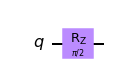

In [54]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.rz(pi/2,0) #Rz 게이트를 넣어 큐비트 0에 pi/2만큼 회전시키기
qc.draw(output="mpl") #양자회로 그리기

아래 코드에서는 큐비트 0을 $\frac{\pi}{2}$ 만큼 회전하는 Rz 게이트의 양자회로를 실행을 시켜 Rz 게이트의 단위 행렬을 출력합니다.

In [55]:
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기

job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[0.707-0.707j, 0.   +0.j   ],
          [0.   +0.j   , 0.707+0.707j]],
         input_dims=(2,), output_dims=(2,))


아래 코드에서는 큐비트 0을 $\frac{\pi}{2}$ 만큼 회전하는 Rz 게이트의 양자회로를 실행을 시켜 Rz 게이트의 상태 벡터를 출력합니다.

In [56]:
state21 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state21.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

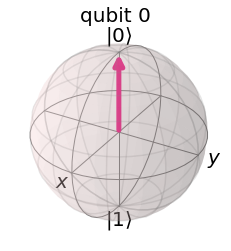

In [57]:
plot_bloch_multivector(state21) # 블로흐 구 그리기

$|0\rangle$상태의 큐비트에 Rz 게이트 [Q-sphere]

![rz-gate](./figure/q-sphere_rz-gate.png)

#### 초기 $|1\rangle$ 상태의 큐비트



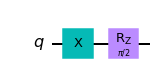

In [58]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.x(0) #|1> 상태로 만들어주기
qc.rz(pi/2,0) #Rz 게이트를 넣어 큐비트 0에 pi/2만큼 회전시키기
qc.draw(output="mpl") #양자회로 그리기

In [59]:
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기

job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #실행 결과를 출력하기

Operator([[0.   +0.j   , 0.707-0.707j],
          [0.707+0.707j, 0.   +0.j   ]],
         input_dims=(2,), output_dims=(2,))


In [60]:
state22 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state22.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

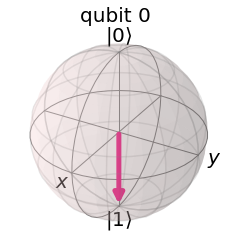

In [61]:
plot_bloch_multivector(state22) # 블로흐 구 그리기

$|1\rangle$상태의 큐비트에 Rz 게이트 [Q-sphere]

![rz-gate2](./figure/q-sphere_rz-gate2.png)

#### 수학적 표현
$$ R_z(\theta) = \begin{pmatrix} e^{-i\frac{\theta}{2}} & 0 \\
0 & e^{i\frac{\theta}{2}} \end{pmatrix}$$

### 예제 1: $Rx(\pi) = -iX$
#### $Rx(\pi)$

In [62]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.rx(pi,0) #Rx 게이트를 넣어 큐비트 0에 pi만큼 회전시키기
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기

print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[0.+0.j, 0.-1.j],
          [0.-1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [63]:
state23 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state23.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

#### $-iX$

In [64]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.x(0) #X 게이트를 넣어 큐비트 0에 더하기
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기

print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [65]:
state24 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state24.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

In [66]:
state25 = -1j * state24
state25.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

### 예제 2: $Ry(\pi) = -iY$
#### $Ry(\pi)$

In [67]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.ry(pi,0) #Ry 게이트를 넣어 큐비트 0에 pi만큼 회전시키기
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기

print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [68]:
state26 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state26.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

#### $-iY$

In [69]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.y(0) #Y 게이트를 넣어 큐비트 0에 더하기
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기

print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[0.-0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [70]:
state27 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state27.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

In [71]:
state28 = -1j * state27
state28.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

### 예제 3: $Rz(\pi) = -iZ$
#### $Rz(\pi)$

In [72]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.rz(pi,0) #Rz 게이트를 넣어 큐비트 0에 pi만큼 회전시키기
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기

print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[0.-1.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))


In [73]:
state29 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state29.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

#### $-iZ$

In [74]:
qc=QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.z(0) #Z 게이트를 넣어 큐비트 0에 더하기
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기

print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[ 1.+0.j,  0.+0.j],
          [-0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [75]:
state30 = execute(qc, StatevectorSimulator()).result().get_statevector() # 상태 벡터 시뮬레이션에 양자회로를 넣어 실행시키기
state30.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

In [76]:
state31 = -1j * state30
state31.draw(output='latex') #latex 형태로 상태 벡터 출력하기

<IPython.core.display.Latex object>

## 7. U 게이트
U 게이트는 3개의 오일러 각을 통해 단일 큐비트 회전을 한다. U 게이트는 파라메터화된 게이트이며 수학적 표현은 아래와 동일하다

$$ U(\theta, \phi, \lambda) = \begin{pmatrix} \cos{(\frac{\theta}{2})} & -e^{i\lambda}\sin{(\frac{\theta}{2})} \\
e^{i\phi}\sin{(\frac{\theta}{2})} & e^{i(\phi+\lambda)}\cos{(\frac{\theta}{2})} \end{pmatrix}$$

### $U(\frac{\pi}{2},\frac{\pi}{2},\frac{\pi}{2})$ 게이트

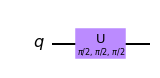

In [77]:
qc = QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.u(pi/2,pi/2,pi/2,0) #U 게이트를 넣어 큐비트 0에 theta=pi/2, phi=pi/2, lambda=pi/2만큼 회전시키기
qc.draw(output="mpl") #mpl 형태로 양자회로 출력하기

In [78]:
backend = Aer.get_backend('unitary_simulator') #unitary simulator를 사용하는 backend를 만들기

job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
Ugate_unitary=result.get_unitary(qc, decimals=3) #단위 행렬 만들기
print(Ugate_unitary) #단위 행렬을 출력하기

Operator([[ 0.707+0.j   , -0.   -0.707j],
          [ 0.   +0.707j, -0.707+0.j   ]],
         input_dims=(2,), output_dims=(2,))


In [79]:
Ugate_unitary.data #단위 행렬 오퍼레이트에서 행렬만 출력하기

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

In [80]:
array_to_latex(Ugate_unitary) #단위 행렬을 latex 형태로 변환하기

<IPython.core.display.Latex object>

### $U(\frac{\pi}{2},0,\pi)$ 게이트 - 큐비트 중첩 상태 만들기

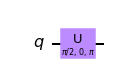

In [81]:
qc = QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.u(pi/2,0,pi,0) #U 게이트를 넣어 큐비트 0에 theta=pi/2, phi=0, lambda=pi만큼 회전시키기
qc.draw(output="mpl") #mpl 형태로 양자회로 출력하기

In [82]:
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
Ugate_unitary=result.get_unitary(qc, decimals=3) #단위 행렬 만들기
print(Ugate_unitary) #단위 행렬을 출력하기

Operator([[ 0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j]],
         input_dims=(2,), output_dims=(2,))


In [83]:
array_to_latex(Ugate_unitary) #단위 행렬을 latex 형태로 변환하기

<IPython.core.display.Latex object>

위의 단위 행렬은 하다마드 게이트의 단위 행렬과 동일하다

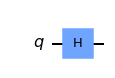

In [84]:
qc = QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.h(0) #H 게이트를 넣어 큐비트 0에 더하기
qc.draw(output="mpl") #mpl 형태로 양자회로 출력하기

In [85]:
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
Hgate_unitary=result.get_unitary(qc, decimals=3) #단위 행렬 만들기
print(Hgate_unitary) #단위 행렬을 출력하기

Operator([[ 0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j]],
         input_dims=(2,), output_dims=(2,))


In [86]:
array_to_latex(Ugate_unitary) #단위 행렬을 latex 형태로 변환하기

<IPython.core.display.Latex object>

### $U(0,0,\lambda)$ 게이트 - P 게이트 만들기

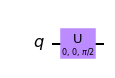

In [87]:
qc = QuantumCircuit(1) #1개의 큐비트를 가진 양자회로 만들기
qc.u(0,0,pi/2,0) #U 게이트를 넣어 큐비트 0에 theta=0, phi=0, lambda=pi/2만큼 회전시키기
qc.draw(output="mpl") #mpl 형태로 양자회로 출력하기

In [88]:
job = execute(qc, backend) #양자회로를 실행시키기
result = job.result() #실행 결과를 가져오기
Ugate_unitary=result.get_unitary(qc, decimals=3) #단위 행렬 만들기
print(Ugate_unitary) #단위 행렬을 출력하기

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))


In [89]:
array_to_latex(Ugate_unitary) #단위 행렬을 latex 형태로 변환하기

<IPython.core.display.Latex object>

### $U(\theta,0,0)$ 게이트 - $RY(\theta)$ 게이트 만들기

In [90]:
from qiskit.quantum_info import Operator #Operator 모듈을 불러오기
from qiskit.extensions import * #UGate, HGate와 같이 게이트 이름들을 사용하여 해당 게이틀을 불러올 수 있게 라이브러리를 추가하기

In [91]:
array_to_latex(Operator(UGate(pi/2,0,0)).data) #U 게이트 정보 중 단위행렬을 latex로 출력하기

<IPython.core.display.Latex object>

In [92]:
array_to_latex(Operator(RYGate(pi/2)).data) #RY 게이트 정보 중 단위행렬을 latex로 출력하기

<IPython.core.display.Latex object>

### $U(\theta,-\frac{\pi}{2},\frac{\pi}{2})$ 게이트 - $RX(\theta)$ 게이트 만들기

In [93]:
array_to_latex(Operator(UGate(0,pi/2,-pi/2)).data) #U 게이트 정보 중 단위행렬을 latex로 출력하기

<IPython.core.display.Latex object>

In [94]:
array_to_latex(Operator(RXGate(0)).data) #RX 게이트 정보 중 단위행렬을 latex로 출력하기

<IPython.core.display.Latex object>


## 8. IBM Quantum Composer
IBM Quantum Composer은 그래픽적인 양자 프로그래밍 도구이며 큐비트에 원하는 게이트를 끌어놓는 형식으로 양자 회로를 만들어 시뮬레이터나 실제 양자 장치에 실행해 볼 수 있습니다. 각각의 게이트가 각 큐비트의 상태에서 어떻게 변화하는지 IBM Quantum Composer을 가지고 놀아보면 게이트들과 친숙해지기 수월해집니다.
[IBM Quantum Composer](https://quantum-computing.ibm.com/composer)

[![ibm quantum composer.gif](figure/ibm_quantum_composer.gif)](https://quantum-computing.ibm.com/composer)

유용한 사이트:
Operations glossary: https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary#rxx-gate

In [95]:
import qiskit.tools.jupyter
%qiskit_version_table #qiskit 버전 표시하기